<div style="display: flex; text-align:center; background-color: RGB(136,202,252);border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em">PROJET 9 - Produisez une étude de marché avec R ou Python - NETTOYAGE DE DONNEES , ACP
    
</h1>
</div>

<div style="border-style: double;border-width: 5px;border-color: RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="200">SOMMAIRE</a> </h3>
        
  - 1. **[PREPARATION DE DONNEES](#1)**
     - 1. [disponibilité alimentaire](#11)
     - 2. [population](#12)
     - 3. [Produit interieur brut (PIB)](#13)
     - 4. [Stabilité politique](#14)
     - 5. [Données agrégées](#15)
  
  - 2. **[ANALYSES DESCRIPTIVES](#2)**
     - 1. [Analyses univariées](#21)
     - 2. [Analyses bivariées](#22)
     - 3. [Analyse en composantes principales ( ACP)](#23)



<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em">0.0 - Importation des librairies et declaration de fonctions</h3>
</div>

In [1]:
#pip install missingno

In [2]:
%pylab inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.max_row',100)


from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer

from scipy.spatial.distance import cdist
import scipy.stats as stats



Populating the interactive namespace from numpy and matplotlib


In [3]:
def list_diff(list1,list2):
    a = set(list1)
    b = set(list2)
    difference_1 = a.difference(b)
    difference_2 = b.difference(a)
    list_difference = list(difference_1.union(difference_2))
    if not list_difference :
        print('les deux listes ont egales')
    else:
        print('les deux listes sont differentes')
    print(list_difference)

<div style="background-color: RGB(136,202,252);" >
<h2 style="margin: auto; padding: 20px;margin-left: 4.5em; text-indent: -4.5em">1 - PREPARATION DE DONNEES</h2>
</div>

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="11">disponibilité alimentaire</a></h3>
</div>

In [4]:
disponibiliteAlimentaire = pd.read_csv("Donnees/DisponibiliteAlimentaire_2017.csv")
disponibiliteAlimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [5]:
disponibiliteAlimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [6]:
disponibiliteAlimentaire.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [7]:
disponibiliteAlimentaire = disponibiliteAlimentaire[['Zone', 'Élément', 'Produit','Année','Unité', 'Valeur']]

In [8]:
disponibiliteAlimentaire['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [9]:
disponibiliteAlimentaire = disponibiliteAlimentaire.pivot_table(index=['Zone'],columns=['Élément'],values=['Valeur'],aggfunc=sum)
disponibiliteAlimentaire.head()

Valeur                        \
Élément        Alimentation pour touristes Aliments pour animaux   
Zone                                                               
Afghanistan                            NaN                 456.0   
Afrique du Sud                         0.0                9371.0   
Albanie                                NaN                 697.0   
Algérie                                0.0                4884.0   
Allemagne                              NaN               30904.0   

                                                      \
Élément        Autres utilisations (non alimentaire)   
Zone                                                   
Afghanistan                                     94.0   
Afrique du Sud                                1448.0   
Albanie                                        177.0   
Algérie                                       2405.0   
Allemagne                                     8316.0   

                                                               \
Élément        Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                            
Afghanistan                                            1997.0   
Afrique du Sud                                         2987.0   
Albanie                                                3400.0   
Algérie                                                3345.0   
Allemagne                                              3559.0   

                                                                       \
Élément        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone                                                                    
Afghanistan                                                357.31       
Afrique du Sud                                             556.42       
Albanie                                                   1260.49       
Algérie                                                    798.71       
Allemagne                                                  943.24       

                                                                              \
Élément        Disponibilité de matière grasse en quantité (g/personne/jour)   
Zone                                                                           
Afghanistan                                                 30.63              
Afrique du Sud                                              81.92              
Albanie                                                    117.57              
Algérie                                                     79.62              
Allemagne                                                  147.96              

                                                                         \
Élément        Disponibilité de protéines en quantité (g/personne/jour)   
Zone                                                                      
Afghanistan                                                 54.09         
Afrique du Sud                                              83.36         
Albanie                                                    119.50         
Algérie                                                     92.85         
Allemagne                                                  104.07         

                                                                 \
Élément        Disponibilité intérieure Exportations - Quantité   
Zone                                                              
Afghanistan                     15139.0                   601.0   
Afrique du Sud                  66840.0                 10968.0   
Albanie                          4879.0                   156.0   
Algérie                         45365.0                   743.0   
Allemagne                      174960.0                 58793.0   

                                                                              \
Élément        Importations - Quantité Nourriture  Pertes Production Résidus 

In [10]:
disponibiliteAlimentaire.head()

Valeur                        \
Élément        Alimentation pour touristes Aliments pour animaux   
Zone                                                               
Afghanistan                            NaN                 456.0   
Afrique du Sud                         0.0                9371.0   
Albanie                                NaN                 697.0   
Algérie                                0.0                4884.0   
Allemagne                              NaN               30904.0   

                                                      \
Élément        Autres utilisations (non alimentaire)   
Zone                                                   
Afghanistan                                     94.0   
Afrique du Sud                                1448.0   
Albanie                                        177.0   
Algérie                                       2405.0   
Allemagne                                     8316.0   

                                                               \
Élément        Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                            
Afghanistan                                            1997.0   
Afrique du Sud                                         2987.0   
Albanie                                                3400.0   
Algérie                                                3345.0   
Allemagne                                              3559.0   

                                                                       \
Élément        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone                                                                    
Afghanistan                                                357.31       
Afrique du Sud                                             556.42       
Albanie                                                   1260.49       
Algérie                                                    798.71       
Allemagne                                                  943.24       

                                                                              \
Élément        Disponibilité de matière grasse en quantité (g/personne/jour)   
Zone                                                                           
Afghanistan                                                 30.63              
Afrique du Sud                                              81.92              
Albanie                                                    117.57              
Algérie                                                     79.62              
Allemagne                                                  147.96              

                                                                         \
Élément        Disponibilité de protéines en quantité (g/personne/jour)   
Zone                                                                      
Afghanistan                                                 54.09         
Afrique du Sud                                              83.36         
Albanie                                                    119.50         
Algérie                                                     92.85         
Allemagne                                                  104.07         

                                                                 \
Élément        Disponibilité intérieure Exportations - Quantité   
Zone                                                              
Afghanistan                     15139.0                   601.0   
Afrique du Sud                  66840.0                 10968.0   
Albanie                          4879.0                   156.0   
Algérie                         45365.0                   743.0   
Allemagne                      174960.0                 58793.0   

                                                                              \
Élément        Importations - Quantité Nourriture  Pertes Production Résidus 

In [11]:
disponibiliteAlimentaire.reset_index(inplace=True)
disponibiliteAlimentaire.columns = disponibiliteAlimentaire.columns.droplevel(level=1)
disponibiliteAlimentaire.head()

#disponibiliteAlimentaire.drop(columns='Produit', inplace=True)

,Zone,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur,Valeur
0,Afghanistan,NaN,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
1,Afrique du Sud,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,10968.0,9020.0,31726.0,3108.0,68455.0,-594.0,212.0,21564.0,-322.0
2,Albanie,NaN,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
3,Algérie,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
4,Allemagne,NaN,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,58793.0,66550.0,77988.0,5756.0,167828.0,-831.0,1712.0,51109.0,651.0


In [12]:
disponibiliteAlimentaire.columns

Index(['Zone', 'Valeur', 'Valeur', 'Valeur', 'Valeur', 'Valeur', 'Valeur',
       'Valeur', 'Valeur', 'Valeur', 'Valeur', 'Valeur', 'Valeur', 'Valeur',
       'Valeur', 'Valeur', 'Valeur', 'Valeur'],
      dtype='object')

In [13]:
disponibiliteAlimentaire.columns = ['Zone','Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Résidus','Semences' ,'Traitement','Variation de stock']
disponibiliteAlimentaire.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
1,Afrique du Sud,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,10968.0,9020.0,31726.0,3108.0,68455.0,-594.0,212.0,21564.0,-322.0
2,Albanie,NaN,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
3,Algérie,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
4,Allemagne,NaN,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,58793.0,66550.0,77988.0,5756.0,167828.0,-831.0,1712.0,51109.0,651.0


In [14]:
disponibiliteAlimentaire = disponibiliteAlimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de protéines en quantité (g/personne/jour)']]

In [15]:
disponibiliteAlimentaire = disponibiliteAlimentaire.groupby(['Zone']).sum()

In [16]:
disponibiliteAlimentaire.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,
Afghanistan,1997.0,357.31,54.09
Afrique du Sud,2987.0,556.42,83.36
Albanie,3400.0,1260.49,119.50
Algérie,3345.0,798.71,92.85
Allemagne,3559.0,943.24,104.07


In [17]:
disponibiliteAlimentaire['Disponibilité alimentaire (Kcal/personne/an)'] = disponibiliteAlimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * 365 
disponibiliteAlimentaire['Disponibilité de protéines en quantité (kg/personne/an)'] = disponibiliteAlimentaire['Disponibilité de protéines en quantité (g/personne/jour)'] * 365 * 0.001

In [18]:
disponibiliteAlimentaire.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité alimentaire (Kcal/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
Zone,,,,,
Afghanistan,1997.0,357.31,54.09,728905.0,19.74285
Afrique du Sud,2987.0,556.42,83.36,1090255.0,30.42640
Albanie,3400.0,1260.49,119.50,1241000.0,43.61750
Algérie,3345.0,798.71,92.85,1220925.0,33.89025
Allemagne,3559.0,943.24,104.07,1299035.0,37.98555


In [19]:
del disponibiliteAlimentaire['Disponibilité alimentaire (Kcal/personne/jour)']
del disponibiliteAlimentaire['Disponibilité de protéines en quantité (g/personne/jour)']
disponibiliteAlimentaire.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
Zone,,,
Afghanistan,357.31,728905.0,19.74285
Afrique du Sud,556.42,1090255.0,30.42640
Albanie,1260.49,1241000.0,43.61750
Algérie,798.71,1220925.0,33.89025
Allemagne,943.24,1299035.0,37.98555


In [20]:
disponibiliteAlimentaire.reset_index(inplace=True)

In [21]:
disponibiliteAlimentaire

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
0,Afghanistan,357.31,728905.0,19.74285
1,Afrique du Sud,556.42,1090255.0,30.42640
2,Albanie,1260.49,1241000.0,43.61750
3,Algérie,798.71,1220925.0,33.89025
4,Allemagne,943.24,1299035.0,37.98555
...,...,...,...,...
169,Émirats arabes unis,627.67,1230050.0,39.14990
170,Équateur,563.62,943525.0,24.00605
171,États-Unis d'Amérique,990.38,1373130.0,41.46765
172,Éthiopie,361.77,840960.0,23.95860


In [22]:
disponibiliteAlimentaire.Zone.tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bangladesh',
 'Barbade',
 'Belgique',
 'Belize',
 'Bermudes',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brunéi Darussalam',
 'Brésil',
 'Bulgarie',
 'Burkina Faso',
 'Bélarus',
 'Bénin',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, Taiwan Province de',
 'Chine, continentale',
 'Chypre',
 'Colombie',
 'Congo',
 'Costa Rica',
 'Croatie',
 'Cuba',
 "Côte d'Ivoire",
 'Danemark',
 'Djibouti',
 'Dominique',
 'El Salvador',
 'Espagne',
 'Estonie',
 'Eswatini',
 'Fidji',
 'Finlande',
 'France',
 'Fédération de Russie',
 'Gabon',
 'Gambie',
 'Ghana',
 'Grenade',
 'Grèce',
 'Guatemala',
 'Guinée',
 'Guinée-Bissau',
 'Guyana',
 'Géorgie',
 'Haïti',
 'Honduras',
 'Hongrie',
 'Inde'

<div style="border: 1px solid RGB(136,202,252);" >
<h4 style="margin: auto; padding: 5px;margin-left: 4.5em; text-indent: -4.5em"><a>disponibilité alimentaire en produits animaux</a></h4>
</div>

#### source de données WHO 
##### Bilans Alimentaires (2010-)
-Année 2017 
-Toutes les pays
-Groupe de produits
  Produits animaux + (Total)
-Elements
 *'Disponibilité alimentaire (Kcal/personne/jour)
 *'Disponibilité de protéines en quantité (g/personne/jour)'


In [23]:
disponibiliteAlimentaireAnimaux = pd.read_csv("Donnees/DisponibiliteAlimentaireEnProduitsAnimaux_2017.csv")
disponibiliteAlimentaireAnimaux.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2941,Produits Animaux,2017,2017,Kcal/personne/jour,189.00,E,Valeur estimée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,S2941,Produits Animaux,2017,2017,g/personne/jour,11.77,E,Valeur estimée
2,FBS,Bilans Alimentaires (2010-),710,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),S2941,Produits Animaux,2017,2017,Kcal/personne/jour,440.00,E,Valeur estimée
3,FBS,Bilans Alimentaires (2010-),710,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,S2941,Produits Animaux,2017,2017,g/personne/jour,37.96,E,Valeur estimée
4,FBS,Bilans Alimentaires (2010-),8,Albanie,664,Disponibilité alimentaire (Kcal/personne/jour),S2941,Produits Animaux,2017,2017,Kcal/personne/jour,1052.00,E,Valeur estimée


In [24]:
disponibiliteAlimentaireAnimaux = disponibiliteAlimentaireAnimaux[[ 'Zone', 'Élément', 'Produit','Année','Unité', 'Valeur']]

In [25]:
disponibiliteAlimentaireAnimaux['Élément'].unique()

array(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)'],
      dtype=object)

In [26]:
disponibiliteAlimentaireAnimaux = disponibiliteAlimentaireAnimaux.pivot_table(index=['Zone'],columns=['Élément'],values=['Valeur'],aggfunc=sum)
disponibiliteAlimentaireAnimaux.head()

Valeur  \
Élément        Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                            
Afghanistan                                             189.0   
Afrique du Sud                                          440.0   
Albanie                                                1052.0   
Algérie                                                 427.0   
Allemagne                                              1099.0   

                                                                         
Élément        Disponibilité de protéines en quantité (g/personne/jour)  
Zone                                                                     
Afghanistan                                                 11.77        
Afrique du Sud                                              37.96        
Albanie                                                     64.80        
Algérie                                                     28.95        
Allemagne                                                   69.25

In [27]:
disponibiliteAlimentaireAnimaux.reset_index(inplace=True)
disponibiliteAlimentaireAnimaux.columns = disponibiliteAlimentaireAnimaux.columns.droplevel(level=1)
disponibiliteAlimentaireAnimaux.head()

,Zone,Valeur,Valeur
0,Afghanistan,189.0,11.77
1,Afrique du Sud,440.0,37.96
2,Albanie,1052.0,64.80
3,Algérie,427.0,28.95
4,Allemagne,1099.0,69.25


In [28]:
disponibiliteAlimentaireAnimaux.columns = ['Zone',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)']
disponibiliteAlimentaireAnimaux.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,189.0,11.77
1,Afrique du Sud,440.0,37.96
2,Albanie,1052.0,64.80
3,Algérie,427.0,28.95
4,Allemagne,1099.0,69.25


In [29]:

disponibiliteAlimentaireAnimaux['Disponibilité alimentaire animale (Kcal/personne/an)'] = disponibiliteAlimentaireAnimaux['Disponibilité alimentaire (Kcal/personne/jour)'] * 365
disponibiliteAlimentaireAnimaux['Disponibilité de protéines animale en quantité (kg/personne/an)'] = disponibiliteAlimentaireAnimaux['Disponibilité de protéines en quantité (g/personne/jour)'] * 365 * 0.001


In [30]:
disponibiliteAlimentaireAnimaux.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité alimentaire animale (Kcal/personne/an),Disponibilité de protéines animale en quantité (kg/personne/an)
0,Afghanistan,189.0,11.77,68985.0,4.29605
1,Afrique du Sud,440.0,37.96,160600.0,13.85540
2,Albanie,1052.0,64.80,383980.0,23.65200
3,Algérie,427.0,28.95,155855.0,10.56675
4,Allemagne,1099.0,69.25,401135.0,25.27625


In [31]:
del disponibiliteAlimentaireAnimaux['Disponibilité de protéines en quantité (g/personne/jour)']
del disponibiliteAlimentaireAnimaux['Disponibilité alimentaire (Kcal/personne/jour)']
disponibiliteAlimentaireAnimaux.head()

,Zone,Disponibilité alimentaire animale (Kcal/personne/an),Disponibilité de protéines animale en quantité (kg/personne/an)
0,Afghanistan,68985.0,4.29605
1,Afrique du Sud,160600.0,13.85540
2,Albanie,383980.0,23.65200
3,Algérie,155855.0,10.56675
4,Allemagne,401135.0,25.27625


In [32]:
disponibiliteAlimentaireAnimaux.Zone.tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bangladesh',
 'Barbade',
 'Belgique',
 'Belize',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Bélarus',
 'Bénin',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, Taiwan Province de',
 'Chine, continentale',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 'Croatie',
 'Cuba',
 "Côte d'Ivoire",
 'Danemark',
 'Djibouti',
 'Dominique',
 'El Salvador',
 'Espagne',
 'Estonie',
 'Eswatini',
 'Fidji',
 'Finlande',
 'France',
 'Fédération de Russie',
 'Gabon',
 'Gambie',
 'Ghana',
 'Grenade',
 'Grèce',
 'Guatemala',
 'Guinée',
 'Guinée-Bissau',
 'Guyana',
 'Géorgie',
 'Haïti',
 'Honduras',
 'Hongrie',
 'Inde',

In [33]:
disponibiliteAlimentaire.shape

(174, 4)

In [34]:
disponibiliteAlimentaireAnimaux.shape

(180, 3)

In [35]:
#difference entre les listes de zones pour correction des differences de denomination d'un dataframe à l'autre
list_diff(disponibiliteAlimentaireAnimaux.Zone.tolist(),disponibiliteAlimentaire.Zone.tolist())

les deux listes sont differentes
['Comores', 'Pays-Bas', 'Brunéi Darussalam', 'Libye', 'Seychelles', 'Chine', 'Papouasie-Nouvelle-Guinée', 'Pays-Bas (Royaume des)', 'Burundi', 'République arabe syrienne', 'République démocratique du Congo', 'Bermudes']


In [36]:
disponibiliteAlimentaireAnimaux.loc[disponibiliteAlimentaireAnimaux['Zone']=='Pays-Bas (Royaume des)']

,Zone,Disponibilité alimentaire animale (Kcal/personne/an),Disponibilité de protéines animale en quantité (kg/personne/an)
122,Pays-Bas (Royaume des),390915.0,24.79445


In [37]:
disponibiliteAlimentaireAnimaux.loc[disponibiliteAlimentaireAnimaux['Zone']=='Pays-Bas (Royaume des)','Zone']='Pays-Bas'

In [38]:
disponibiliteAlimentaireAnimaux.loc[disponibiliteAlimentaireAnimaux['Zone']=='Pays-Bas']

,Zone,Disponibilité alimentaire animale (Kcal/personne/an),Disponibilité de protéines animale en quantité (kg/personne/an)
122,Pays-Bas,390915.0,24.79445


In [39]:
list_diff(disponibiliteAlimentaireAnimaux.Zone.tolist(),disponibiliteAlimentaire.Zone.tolist())

les deux listes sont differentes
['Comores', 'Brunéi Darussalam', 'Libye', 'Seychelles', 'Chine', 'Papouasie-Nouvelle-Guinée', 'Burundi', 'République arabe syrienne', 'République démocratique du Congo', 'Bermudes']


In [40]:
#agregation disponibilité alimentaire
disponibiliteAlimentaire = disponibiliteAlimentaire.merge(disponibiliteAlimentaireAnimaux, on = 'Zone',how='outer',indicator=True)

In [41]:
disponibiliteAlimentaire[disponibiliteAlimentaire._merge=='left_only']

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Disponibilité de protéines animale en quantité (kg/personne/an),_merge
18,Bermudes,0.0,0.0,0.0,NaN,NaN,left_only
22,Brunéi Darussalam,0.0,0.0,0.0,NaN,NaN,left_only


In [42]:
#Les données de bilan alimentaire de ces 2 zones ne sont pas fournies . Nous decidons de les retirer de l'analyse
disponibiliteAlimentaire.dropna(inplace=True)
del disponibiliteAlimentaire['_merge']

In [43]:
disponibiliteAlimentaire.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Disponibilité de protéines animale en quantité (kg/personne/an)
0,Afghanistan,357.31,728905.0,19.74285,68985.0,4.29605
1,Afrique du Sud,556.42,1090255.0,30.42640,160600.0,13.85540
2,Albanie,1260.49,1241000.0,43.61750,383980.0,23.65200
3,Algérie,798.71,1220925.0,33.89025,155855.0,10.56675
4,Allemagne,943.24,1299035.0,37.98555,401135.0,25.27625


In [44]:
#Calcul du ratio de la disponibilité en protéines d'origine animale sur la disponibilité totale en protéines
disponibiliteAlimentaire['Ratio de proteine Animale en quantité (%)'] = round(100 * disponibiliteAlimentaire['Disponibilité de protéines animale en quantité (kg/personne/an)'] / disponibiliteAlimentaire['Disponibilité de protéines en quantité (kg/personne/an)'],2)
disponibiliteAlimentaire.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Disponibilité de protéines animale en quantité (kg/personne/an),Ratio de proteine Animale en quantité (%)
0,Afghanistan,357.31,728905.0,19.74285,68985.0,4.29605,21.76
1,Afrique du Sud,556.42,1090255.0,30.42640,160600.0,13.85540,45.54
2,Albanie,1260.49,1241000.0,43.61750,383980.0,23.65200,54.23
3,Algérie,798.71,1220925.0,33.89025,155855.0,10.56675,31.18
4,Allemagne,943.24,1299035.0,37.98555,401135.0,25.27625,66.54


In [45]:
disponibiliteAlimentaire.columns

Index(['Zone', 'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/an)',
       'Disponibilité de protéines en quantité (kg/personne/an)',
       'Disponibilité alimentaire animale (Kcal/personne/an)',
       'Disponibilité de protéines animale en quantité (kg/personne/an)',
       'Ratio de proteine Animale en quantité (%)'],
      dtype='object')

In [46]:
del disponibiliteAlimentaire['Disponibilité de protéines en quantité (kg/personne/an)']
del disponibiliteAlimentaire['Disponibilité de protéines animale en quantité (kg/personne/an)']

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="12">population</a></h3>
</div>

In [47]:
population = pd.read_csv("Donnees/Population_2000_2018.csv")
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [48]:
population = population[['Zone','Année','Valeur']]
population['Valeur'] = population['Valeur'] * 1000
population.head()

,Zone,Année,Valeur
0,Afghanistan,2000,20779953.0
1,Afghanistan,2001,21606988.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680871.0
4,Afghanistan,2004,24726684.0


In [49]:
population = population.pivot_table(index=['Zone'],columns=['Année'],values=['Valeur'],aggfunc=sum)
population.head()

Valeur                                                  \
Année                 2000        2001        2002        2003        2004   
Zone                                                                         
Afghanistan     20779953.0  21606988.0  22600770.0  23680871.0  24726684.0   
Afrique du Sud  44967708.0  45571274.0  46150913.0  46719196.0  47291610.0   
Albanie          3129243.0   3129704.0   3126187.0   3118023.0   3104892.0   
Algérie         31042235.0  31451514.0  31855109.0  32264157.0  32692163.0   
Allemagne       81400882.0  81453885.0  81535122.0  81614380.0  81646474.0   

                                                                            \
Année                 2005        2006        2007        2008        2009   
Zone                                                                         
Afghanistan     25654277.0  26433049.0  27100536.0  27722276.0  28394813.0   
Afrique du Sud  47880601.0  48489459.0  49119759.0  49779471.0  50477011.0   
Albanie          3086810.0   3063021.0   3033998.0   3002678.0   2973048.0   
Algérie         33149724.0  33641002.0  34166972.0  34730608.0  35333881.0   
Allemagne       81602741.0  81472226.0  81277830.0  81065752.0  80899961.0   

                                                                            \
Année                 2010        2011        2012        2013        2014   
Zone                                                                         
Afghanistan     29185507.0  30117413.0  31161376.0  32269589.0  33370794.0   
Afrique du Sud  51216964.0  52003755.0  52832658.0  53687121.0  54544186.0   
Albanie          2948023.0   2928592.0   2914096.0   2903790.0   2896305.0   
Algérie         35977455.0  36661445.0  37383895.0  38140133.0  38923692.0   
Allemagne       80827002.0  80855632.0  80972628.0  81174367.0  81450378.0   

                                                                
Année                 2015        2016        2017        2018  
Zone                                                            
Afghanistan     34413603.0  35383032.0  36296113.0  37171921.0  
Afrique du Sud  55386367.0  56207646.0  57009756.0  57792518.0  
Albanie          2890513.0   2886438.0   2884169.0   2882740.0  
Algérie         39728025.0  40551392.0  41389189.0  42228408.0  
Allemagne       81787411.0  82193768.0  82658409.0  83124418.0

In [50]:
population.reset_index(inplace=True)
population.head()

Zone      Valeur                                      \
Année                        2000        2001        2002        2003   
0         Afghanistan  20779953.0  21606988.0  22600770.0  23680871.0   
1      Afrique du Sud  44967708.0  45571274.0  46150913.0  46719196.0   
2             Albanie   3129243.0   3129704.0   3126187.0   3118023.0   
3             Algérie  31042235.0  31451514.0  31855109.0  32264157.0   
4           Allemagne  81400882.0  81453885.0  81535122.0  81614380.0   

                                                                               \
Année        2004        2005        2006        2007        2008        2009   
0      24726684.0  25654277.0  26433049.0  27100536.0  27722276.0  28394813.0   
1      47291610.0  47880601.0  48489459.0  49119759.0  49779471.0  50477011.0   
2       3104892.0   3086810.0   3063021.0   3033998.0   3002678.0   2973048.0   
3      32692163.0  33149724.0  33641002.0  34166972.0  34730608.0  35333881.0   
4      81646474.0  81602741.0  81472226.0  81277830.0  81065752.0  80899961.0   

                                                                               \
Année        2010        2011        2012        2013        2014        2015   
0      29185507.0  30117413.0  31161376.0  32269589.0  33370794.0  34413603.0   
1      51216964.0  52003755.0  52832658.0  53687121.0  54544186.0  55386367.0   
2       2948023.0   2928592.0   2914096.0   2903790.0   2896305.0   2890513.0   
3      35977455.0  36661445.0  37383895.0  38140133.0  38923692.0  39728025.0   
4      80827002.0  80855632.0  80972628.0  81174367.0  81450378.0  81787411.0   

                                           
Année        2016        2017        2018  
0      35383032.0  36296113.0  37171921.0  
1      56207646.0  57009756.0  57792518.0  
2       2886438.0   2884169.0   2882740.0  
3      40551392.0  41389189.0  42228408.0  
4      82193768.0  82658409.0  83124418.0

In [51]:
population.columns = population.columns.droplevel(level=1)


In [52]:
population.columns = ['Zone','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
population.head()

,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0
1,Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0
2,Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0
3,Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0
4,Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0


In [53]:
population = population[['Zone','2015','2018']]
population.head()

,Zone,2015,2018
0,Afghanistan,34413603.0,37171921.0
1,Afrique du Sud,55386367.0,57792518.0
2,Albanie,2890513.0,2882740.0
3,Algérie,39728025.0,42228408.0
4,Allemagne,81787411.0,83124418.0


In [54]:
population['Evolution de la population 2015-2018'] = 100*(population['2018']-population['2015'])/population['2015']
population.head()

,Zone,2015,2018,Evolution de la population 2015-2018
0,Afghanistan,34413603.0,37171921.0,8.015197
1,Afrique du Sud,55386367.0,57792518.0,4.344302
2,Albanie,2890513.0,2882740.0,-0.268914
3,Algérie,39728025.0,42228408.0,6.293751
4,Allemagne,81787411.0,83124418.0,1.634734


In [55]:
population = population[['Zone','Evolution de la population 2015-2018']]
population

,Zone,Evolution de la population 2015-2018
0,Afghanistan,8.015197
1,Afrique du Sud,4.344302
2,Albanie,-0.268914
3,Algérie,6.293751
4,Allemagne,1.634734
...,...,...
233,Îles Salomon,8.246977
234,Îles Turques-et-Caïques,4.680248
235,Îles Vierges américaines,-0.264868
236,Îles Vierges britanniques,2.229693


In [56]:
population.loc[population.Zone=="Pays-Bas"]

,Zone,Evolution de la population 2015-2018
147,Pays-Bas,0.714709


In [57]:
population.Zone.tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Anguilla',
 'Antigua-et-Barbuda',
 'Antilles néerlandaises (ex)',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Aruba',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bahreïn',
 'Bangladesh',
 'Barbade',
 'Belgique',
 'Belize',
 'Bermudes',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Bonaire, Saint-Eustache et Saba',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brunéi Darussalam',
 'Brésil',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Bélarus',
 'Bénin',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, Taiwan Province de',
 'Chine, continentale',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 'Croatie',
 'Cuba',
 'Curaçao',
 "Côte d'Ivoire",
 'Danemark',
 'Djibouti',
 'Dominique',
 'El Salvador',
 'Espagne',
 'Estonie',
 'Eswatini',
 'Fidji',
 'Finlande',
 'France',
 'Fédération de Russie'

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="13">PIB</a></h3>
</div>

In [58]:
pib = pd.read_csv("Donnees/Pib_2017.csv")
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752217,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936055,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44670.222282,X,Ciffre de sources internationales,NaN


In [59]:
pib = pib[['Zone','Valeur']]
pib.rename(columns={'Valeur':"PIB par habitant(en usd)"},inplace=True)
pib.head()

,Zone,PIB par habitant(en usd)
0,Afghanistan,530.149831
1,Afrique du Sud,6723.928582
2,Albanie,4521.752217
3,Algérie,4134.936055
4,Allemagne,44670.222282


In [60]:
pib.Zone.tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Anguilla',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Aruba',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bahreïn',
 'Bangladesh',
 'Barbade',
 'Bélarus',
 'Belgique',
 'Belize',
 'Bénin',
 'Bermudes',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Brunéi Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, continentale',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatie',
 'Cuba',
 'Curaçao',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Égypte',
 'El Salvador',
 'Émirats arabes unis',
 'Équateur',
 'Érythrée',
 'Espagne',
 'Estonie',
 'Eswatini',
 "États-Unis d'Amérique",
 'Éthiopie',
 'Fédération de Russie',
 'Fidji',
 'Finlande

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="14">Stabilité politique</a></h3>
</div>

In [61]:
stabilitePolitique = pd.read_csv('Donnees/StabilitePolitique_2017.csv')
stabilitePolitique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN


In [62]:
stabilitePolitique = stabilitePolitique[['Zone','Valeur']]
stabilitePolitique.rename(columns={'Valeur':"stabilite_pol"},inplace=True)
stabilitePolitique.head()

,Zone,stabilite_pol
0,Pays-Bas (Royaume des),0.92
1,Afghanistan,-2.80
2,Afrique du Sud,-0.28
3,Albanie,0.38
4,Algérie,-0.92


In [63]:
stabilitePolitique.Zone.tolist()

['Pays-Bas (Royaume des)',
 'Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bahreïn',
 'Bangladesh',
 'Barbade',
 'Bélarus',
 'Belgique',
 'Belize',
 'Bénin',
 'Bermudes',
 'Bhoutan',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Brunéi Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatie',
 'Cuba',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Égypte',
 'El Salvador',
 'Émirats arabes unis',
 'Équateur',
 'Érythrée',
 'Espagne',
 'Estonie',
 'Eswatini',
 "États-Unis d'Amérique",
 'Éthiopie',
 'Fédération de Russie',
 'Fidji',
 'Finlande',
 'France',
 'Gabon',
 'Gambie',
 'Géorgie',
 'Ghana',
 'Grèce',
 'Grenade',
 'Groenland',
 'G

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="15">Données agrégées</a></h3>
</div>

In [64]:
#dataframe : disponibiliteAlimentaire ,population ,pib,stabilitePolitique


In [65]:
disponibiliteAlimentaire.shape

(172, 5)

In [66]:
#print(disponibiliteAlimentaire.info())

In [67]:
population.shape

(238, 2)

In [68]:
print(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Zone                                  238 non-null    object 
 1   Evolution de la population 2015-2018  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB
None


In [69]:
population.Zone.duplicated().value_counts()

False    238
Name: Zone, dtype: int64

In [70]:
pib.shape

(211, 2)

In [71]:
print(pib.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      211 non-null    object 
 1   PIB par habitant(en usd)  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB
None


In [72]:
pib.duplicated().value_counts()

False    211
dtype: int64

In [73]:
stabilitePolitique.shape

(194, 2)

In [74]:
print(stabilitePolitique.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zone           194 non-null    object 
 1   stabilite_pol  194 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
None


In [75]:
stabilitePolitique.duplicated().value_counts()

False    194
dtype: int64

In [76]:
#jointure disponibiliteAlimentaire-population
data = disponibiliteAlimentaire.merge(population,on='Zone',how='outer',indicator=True)

In [77]:
df = data[data['_merge']!='both']
print(df.shape)

(66, 7)


In [78]:
del data['_merge']

In [79]:
df[df._merge=='right_only']

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,_merge
172,Andorre,NaN,NaN,NaN,NaN,-1.288280,right_only
173,Anguilla,NaN,NaN,NaN,NaN,3.165488,right_only
174,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,2.795848,right_only
175,Aruba,NaN,NaN,NaN,NaN,1.441428,right_only
176,Bahreïn,NaN,NaN,NaN,NaN,14.403532,right_only
177,Bermudes,NaN,NaN,NaN,NaN,-1.469572,right_only
178,Bhoutan,NaN,NaN,NaN,NaN,3.642379,right_only
179,"Bonaire, Saint-Eustache et Saba",NaN,NaN,NaN,NaN,4.643875,right_only
180,Brunéi Darussalam,NaN,NaN,NaN,NaN,3.387747,right_only
181,Burundi,NaN,NaN,NaN,NaN,9.993514,right_only


<div class="alert alert-block alert-danger">
On peut constater que les données de bilan alimentataire ne sont pas disponibles pour certains pays. On exclura ces pays de notre analyses .
 </div>

In [80]:
#data.dropna(inplace=True)

In [81]:
data.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018
0,Afghanistan,357.31,728905.0,68985.0,21.76,8.015197
1,Afrique du Sud,556.42,1090255.0,160600.0,45.54,4.344302
2,Albanie,1260.49,1241000.0,383980.0,54.23,-0.268914
3,Algérie,798.71,1220925.0,155855.0,31.18,6.293751
4,Allemagne,943.24,1299035.0,401135.0,66.54,1.634734


In [82]:
# jointure des tables data - pib

data = data.merge(pib,on='Zone',how='outer',indicator=True)

In [83]:
df = data[data['_merge']!='both']
print(df.shape)

(33, 8)


In [84]:
del data['_merge']

In [85]:
df[df._merge=='left_only']

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),_merge
33,"Chine, Taiwan Province de",640.37,1086240.0,225935.0,59.16,0.717322,NaN,left_only
117,Pays-Bas,945.03,1186615.0,390915.0,65.05,0.714709,NaN,left_only
174,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,2.795848,NaN,left_only
179,"Bonaire, Saint-Eustache et Saba",NaN,NaN,NaN,NaN,4.643875,NaN,left_only
184,Gibraltar,NaN,NaN,NaN,NaN,-0.053355,NaN,left_only
186,Guadeloupe,NaN,NaN,NaN,NaN,-0.101685,NaN,left_only
187,Guam,NaN,NaN,NaN,NaN,2.418862,NaN,left_only
189,Guyane française,NaN,NaN,NaN,NaN,8.405779,NaN,left_only
192,Martinique,NaN,NaN,NaN,NaN,-0.741126,NaN,left_only
193,Mayotte,NaN,NaN,NaN,NaN,8.128906,NaN,left_only


In [86]:
# jointure entre les tables data et stabilite_politique
data = data.merge(stabilitePolitique,on='Zone', how='outer' ,indicator = True)

In [87]:
df = data[data['_merge']!='both']
del data['_merge']
df[df['_merge']=='left_only']

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol,_merge
31,Chine - RAS de Hong-Kong,776.03,1223845.0,440920.0,76.52,2.584666,45737.483211,NaN,left_only
32,Chine - RAS de Macao,726.13,1094635.0,352955.0,81.29,4.908111,78985.632295,NaN,left_only
33,"Chine, Taiwan Province de",640.37,1086240.0,225935.0,59.16,0.717322,NaN,NaN,left_only
34,"Chine, continentale",968.52,1166905.0,223380.0,45.65,1.478477,8729.136930,NaN,left_only
108,Nouvelle-Calédonie,584.49,1003750.0,260975.0,66.23,3.293675,32263.340715,NaN,left_only
117,Pays-Bas,945.03,1186615.0,390915.0,65.05,0.714709,NaN,NaN,left_only
120,Polynésie française,678.75,1064705.0,286525.0,67.35,1.667741,19743.958993,NaN,left_only
173,Anguilla,NaN,NaN,NaN,NaN,3.165488,18718.318718,NaN,left_only
174,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,2.795848,NaN,NaN,left_only
175,Aruba,NaN,NaN,NaN,NaN,1.441428,29329.092343,NaN,left_only


In [88]:
# Nettoyage de la table data

In [89]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    241 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
 2   Disponibilité alimentaire (Kcal/personne/an)            172 non-null    float64
 3   Disponibilité alimentaire animale (Kcal/personne/an)    172 non-null    float64
 4   Ratio de proteine Animale en quantité (%)               172 non-null    float64
 5   Evolution de la population 2015-2018                    236 non-null    float64
 6   PIB par habitant(en usd)                                211 non-null    float64
 7   stabilite_pol                                           194 non-null    float64
dtypes: float64(7), object(1)
memory usage: 16

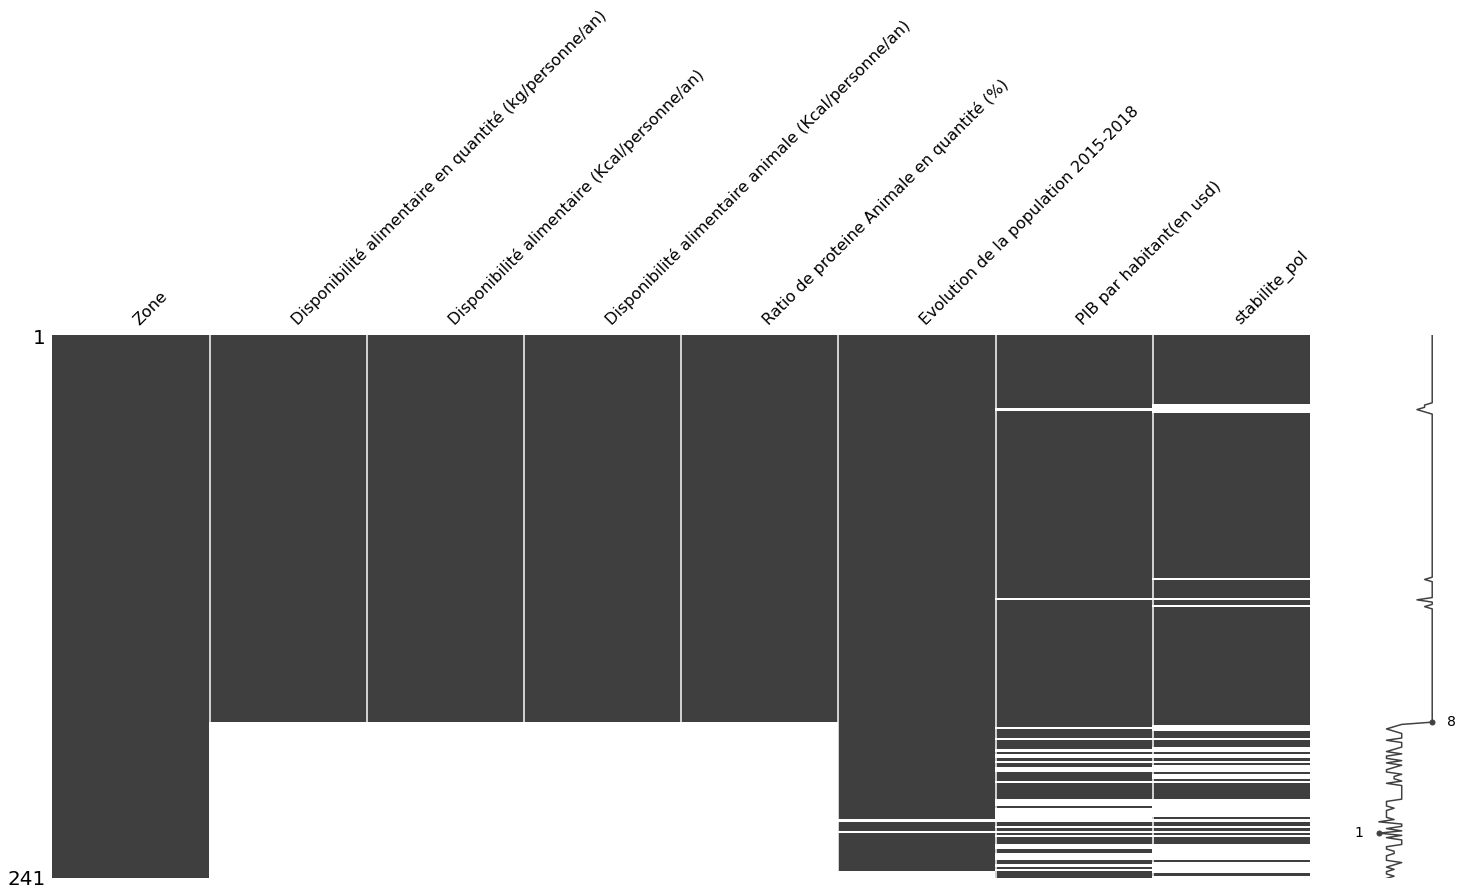

In [90]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(data)
plt.show()


### Nous pouvons constater que les données de bilan alimentaire de certaines zones ne sont pas fournies .Nous decidons d' exclures ces zones de l'analyse

In [91]:
# Tableau des valeurs manquantes par colonne
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                                                    Missing Values  Percentage
Zone                                                             0    0.000000
Disponibilité alimentaire en quantité (kg/perso...              69   28.630705
Disponibilité alimentaire (Kcal/personne/an)                    69   28.630705
Disponibilité alimentaire animale (Kcal/personn...              69   28.630705
Ratio de proteine Animale en quantité (%)                       69   28.630705
Evolution de la population 2015-2018                             5    2.074689
PIB par habitant(en usd)                                        30   12.448133
stabilite_pol                                                   47   19.502075


In [92]:
data.dropna(thresh=6,inplace=True)


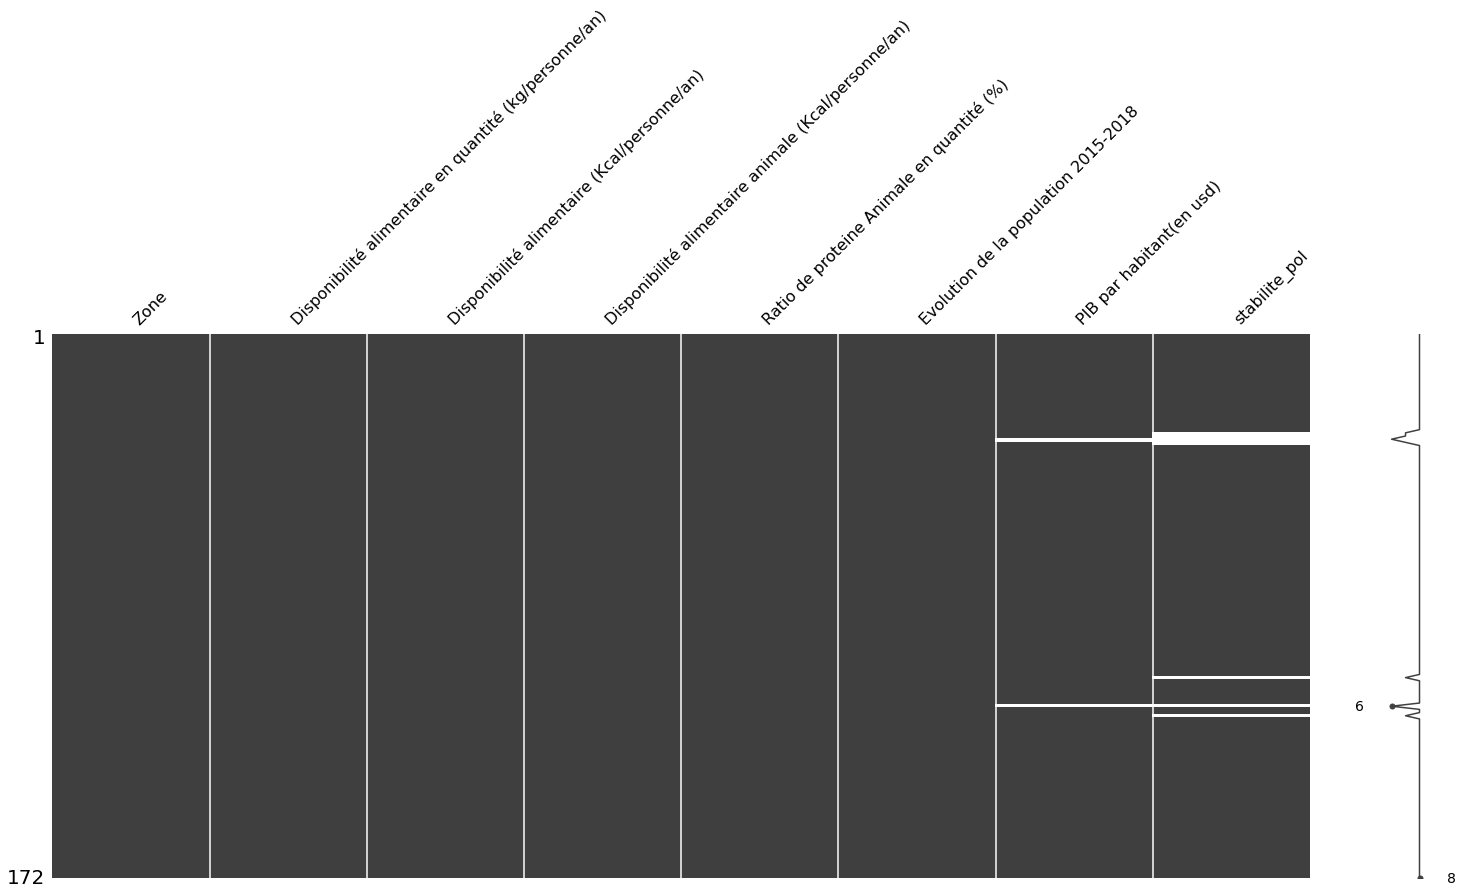

In [93]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(data)
plt.show()

In [94]:
data.loc[data['PIB par habitant(en usd)'].isnull()]

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
33,"Chine, Taiwan Province de",640.37,1086240.0,225935.0,59.16,0.717322,NaN,NaN
117,Pays-Bas,945.03,1186615.0,390915.0,65.05,0.714709,NaN,NaN


In [95]:
# Pays bas /PIB par habitant (2017) 48675.2 USD  , source  banque mondiale
data.loc[data['Zone']=='Pays-Bas',['PIB par habitant(en usd)']]= 48675.2


In [96]:
data.loc[data['stabilite_pol'].isnull()]

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
31,Chine - RAS de Hong-Kong,776.03,1223845.0,440920.0,76.52,2.584666,45737.483211,NaN
32,Chine - RAS de Macao,726.13,1094635.0,352955.0,81.29,4.908111,78985.632295,NaN
33,"Chine, Taiwan Province de",640.37,1086240.0,225935.0,59.16,0.717322,NaN,NaN
34,"Chine, continentale",968.52,1166905.0,223380.0,45.65,1.478477,8729.136930,NaN
108,Nouvelle-Calédonie,584.49,1003750.0,260975.0,66.23,3.293675,32263.340715,NaN
117,Pays-Bas,945.03,1186615.0,390915.0,65.05,0.714709,48675.200000,NaN
120,Polynésie française,678.75,1064705.0,286525.0,67.35,1.667741,19743.958993,NaN


In [97]:
# Multiples imputations par données d'autres sources

# Pays bas /stabilité politique  (2017) 0.91  ,source FAO 
data.loc[data['Zone']=='Pays-Bas',['stabilite_pol']]=0.92

# Chine -  /stabilité politique  (2017)   , source  FAO
data.loc[data['Zone']=='Chine - RAS de Hong-Kong',['stabilite_pol']]=0.83

# Chine -  /stabilité politique par habitant (2017)   , source  FAO
data.loc[data['Zone']=='Chine - RAS de Macao',['stabilite_pol']]=1.43




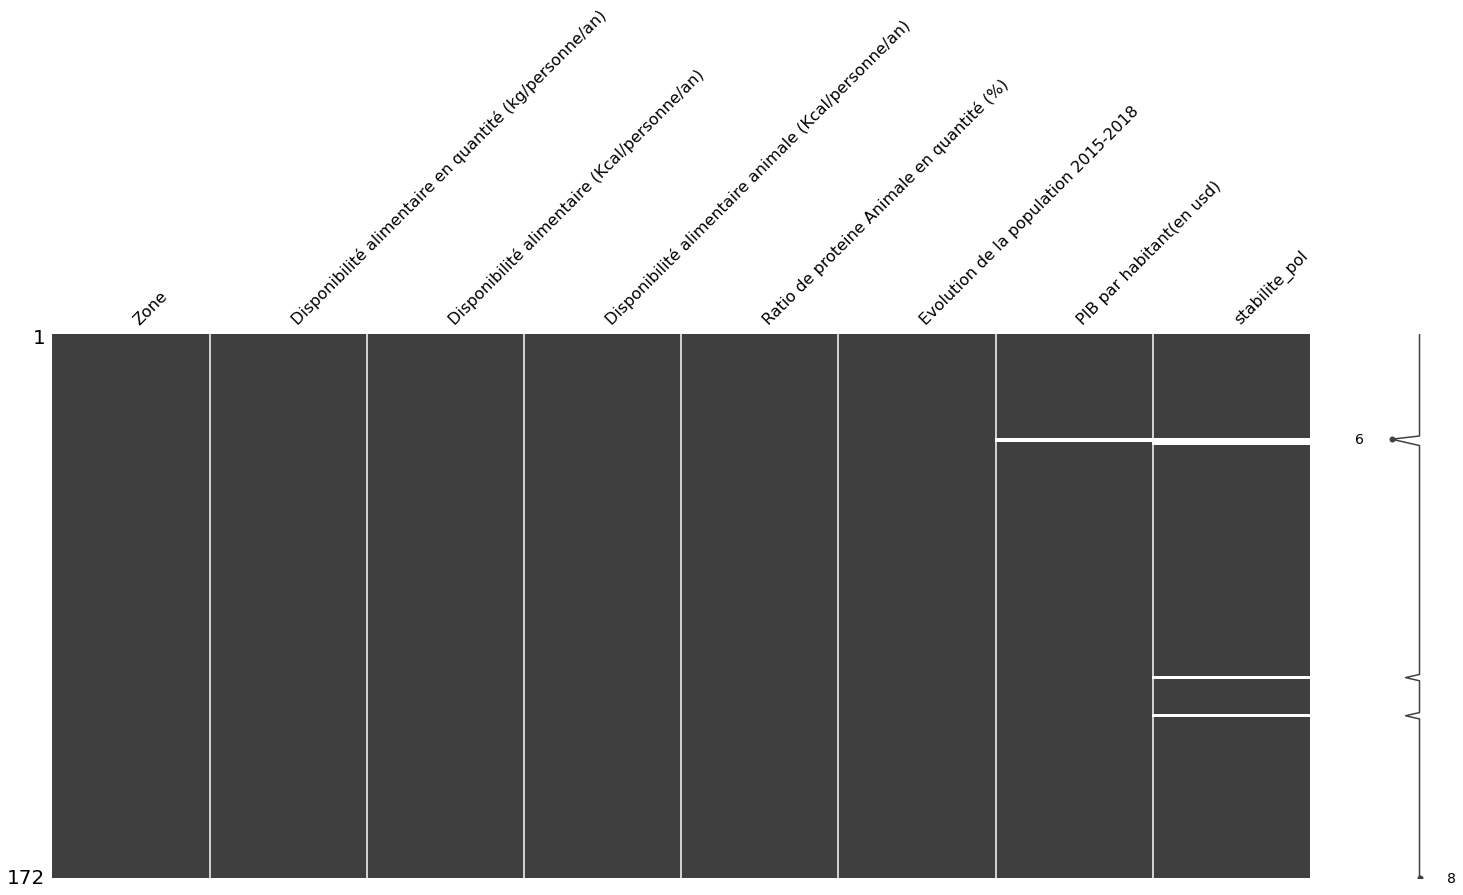

In [98]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(data)
plt.show()

##### Nous avons encore quelques données manquantes que nous imputerons par KNN avec 3 plus proches voisins

In [99]:
# Imputation par KNN Imputer
#KNN imputer avec 3 voisins pour plusieurs colonnes
imputer = KNNImputer(n_neighbors=3)

data[['stabilite_pol','PIB par habitant(en usd)']] = imputer.fit_transform(data[['stabilite_pol', 'PIB par habitant(en usd)']])

data.isnull().mean()

Zone                                                      0.0
Disponibilité alimentaire en quantité (kg/personne/an)    0.0
Disponibilité alimentaire (Kcal/personne/an)              0.0
Disponibilité alimentaire animale (Kcal/personne/an)      0.0
Ratio de proteine Animale en quantité (%)                 0.0
Evolution de la population 2015-2018                      0.0
PIB par habitant(en usd)                                  0.0
stabilite_pol                                             0.0
dtype: float64

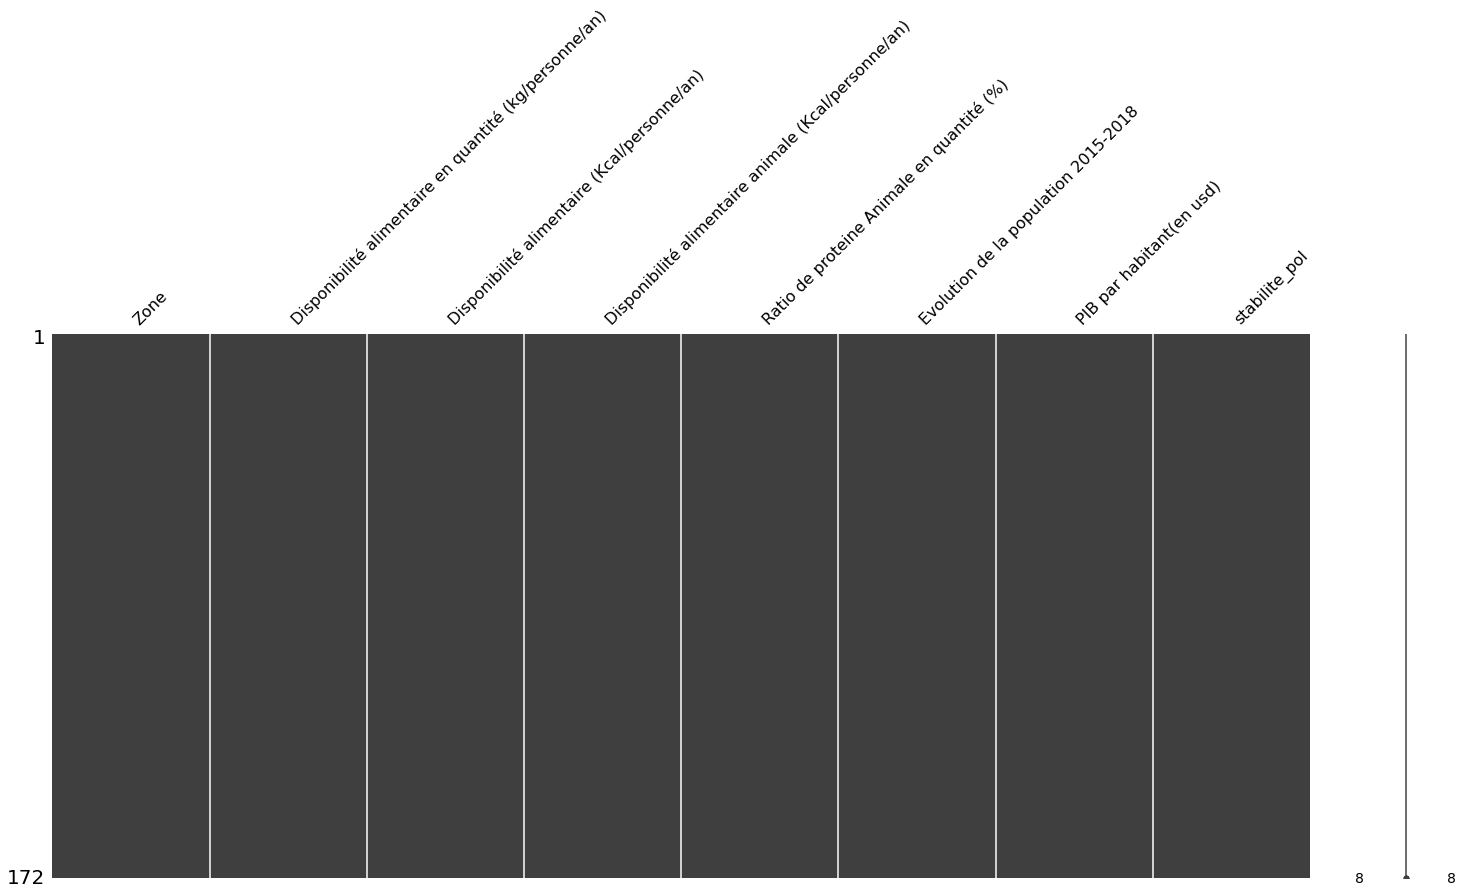

In [100]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(data)
plt.show()

In [101]:
data.columns

Index(['Zone', 'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/an)',
       'Disponibilité alimentaire animale (Kcal/personne/an)',
       'Ratio de proteine Animale en quantité (%)',
       'Evolution de la population 2015-2018', 'PIB par habitant(en usd)',
       'stabilite_pol'],
      dtype='object')

In [102]:
data.to_csv('Donnees/data.csv',index=False)

In [103]:
data

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
0,Afghanistan,357.31,728905.0,68985.0,21.76,8.015197,530.149831,-2.80
1,Afrique du Sud,556.42,1090255.0,160600.0,45.54,4.344302,6723.928582,-0.28
2,Albanie,1260.49,1241000.0,383980.0,54.23,-0.268914,4521.752217,0.38
3,Algérie,798.71,1220925.0,155855.0,31.18,6.293751,4134.936055,-0.92
4,Allemagne,943.24,1299035.0,401135.0,66.54,1.634734,44670.222282,0.59
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,627.67,1230050.0,181405.0,36.85,3.973475,42522.377617,0.62
168,Équateur,563.62,943525.0,196735.0,53.84,5.380810,6246.404252,-0.07
169,États-Unis d'Amérique,990.38,1373130.0,379235.0,71.99,1.937792,59059.596403,0.29
170,Éthiopie,361.77,840960.0,37230.0,9.81,8.319450,709.761008,-1.68


<div style="background-color: RGB(136,202,252);" >
<h2 style="margin: auto; padding: 20px;margin-left: 4.5em; text-indent: -4.5em">2 - ANALYSES DESCRIPTIVES</h2>
</div>

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="21">Analyses univariées</a></h3>
</div>

In [104]:
data.describe(include="all")

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
count,172,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000
unique,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,692.573081,1.043314e+06,208531.715116,48.582093,3.890955,13969.200455,-0.065987
std,NaN,200.704764,1.659087e+05,121979.701033,18.612424,3.479627,19198.684450,0.891950
min,NaN,302.470000,6.402100e+05,30660.000000,9.810000,-4.455025,414.740323,-2.940000
25%,NaN,537.755000,9.177012e+05,105028.750000,32.655000,1.406045,1942.973509,-0.622500
50%,NaN,677.455000,1.048098e+06,196552.500000,50.205000,3.584056,6031.146548,-0.020000
75%,NaN,882.612500,1.186341e+06,311801.250000,62.912500,6.325076,16728.623242,0.635000


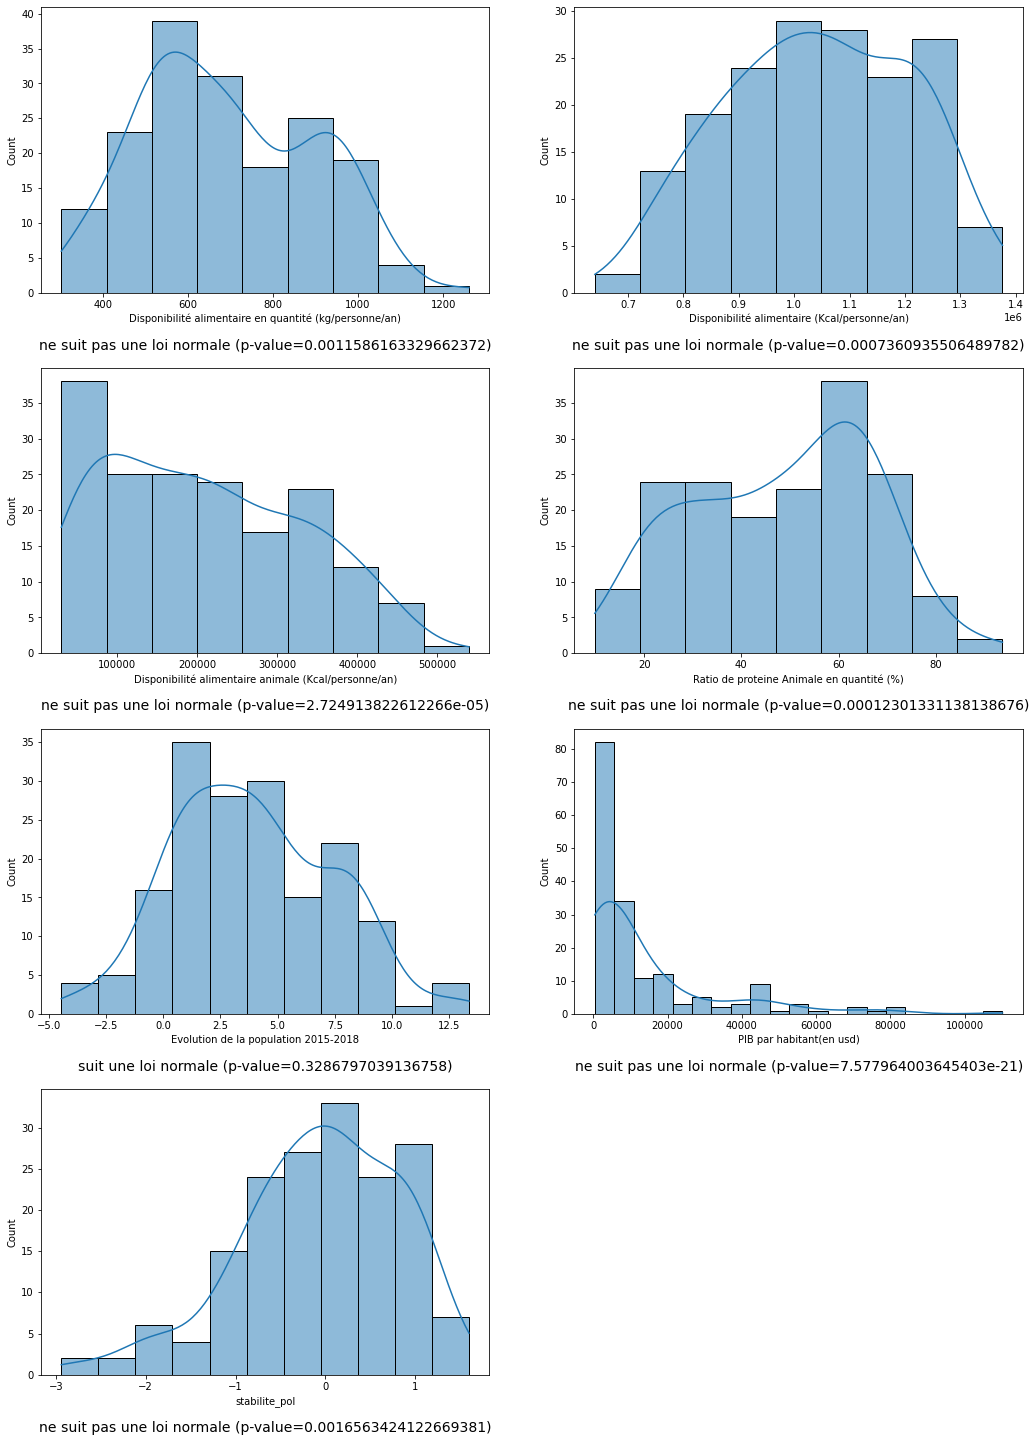

In [105]:
# Sélectionner uniquement les colonnes numériques
data_numeric = data.select_dtypes(include=[np.number])

num_cols = len(data_numeric.columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

fig = plt.figure(figsize=(15, num_rows*5))

for i, column in enumerate(data_numeric.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(data_numeric[column].dropna(), kde=True)
   # plt.title(column, fontsize=16)  # Augmenter la taille du titre
    
    # Vérification de la normalité
    statistic, p_value = stats.normaltest(data_numeric[column].dropna())
    if p_value < 0.05:
        test_result = f"ne suit pas une loi normale (p-value={p_value})"
    else:
        test_result = f"suit une loi normale (p-value={p_value})"
    
    plt.text(0.5, -0.2, test_result, size=14, ha='center', transform=plt.gca().transAxes)  # Augmenter la taille du texte

# Ajustement de la marge entre les lignes des sous-graphiques
plt.tight_layout(h_pad=2.5)  # Augmentez la valeur de h_pad selon vos besoins
plt.show()

# Sauvegarde de l'image avec une résolution plus élevée
fig.savefig('analyse_univariees.png', dpi=300)  # Augmenter le dpi pour une meilleure résolution


In [106]:
data.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
count,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000
mean,692.573081,1.043314e+06,208531.715116,48.582093,3.890955,13969.200455,-0.065987
std,200.704764,1.659087e+05,121979.701033,18.612424,3.479627,19198.684450,0.891950
min,302.470000,6.402100e+05,30660.000000,9.810000,-4.455025,414.740323,-2.940000
25%,537.755000,9.177012e+05,105028.750000,32.655000,1.406045,1942.973509,-0.622500
50%,677.455000,1.048098e+06,196552.500000,50.205000,3.584056,6031.146548,-0.020000
75%,882.612500,1.186341e+06,311801.250000,62.912500,6.325076,16728.623242,0.635000
max,1260.490000,1.376050e+06,539470.000000,93.780000,13.360958,110203.008207,1.600000


<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="22">Analyses bivariées</a></h3>
</div>

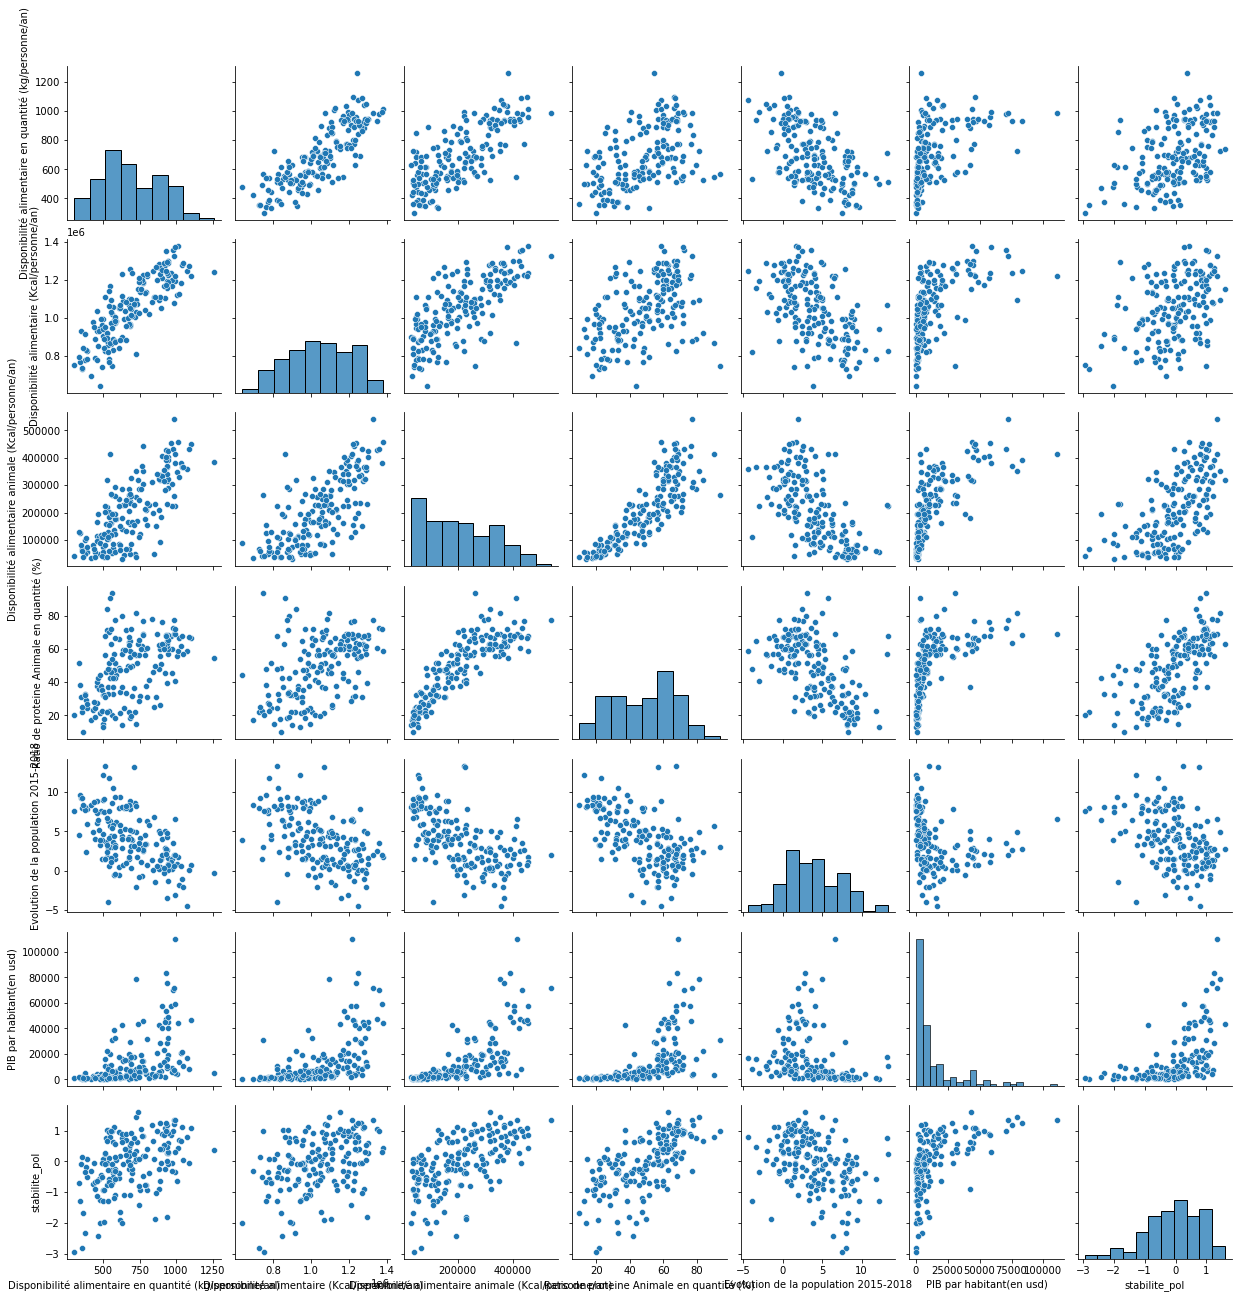

In [107]:
# Graphiques bivariés

sns.pairplot(data)



In [108]:
# Sélectionner uniquement les colonnes numériques
data_numeric = data.select_dtypes(include=[np.number])

# Calculer la corrélation de Spearman
correlation_spearman = data_numeric.corr(method='spearman')

# Afficher le résultat
correlation_spearman

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
Disponibilité alimentaire en quantité (kg/personne/an),1.000000,0.841514,0.735356,0.524448,-0.552369,0.624285,0.447502
Disponibilité alimentaire (Kcal/personne/an),0.841514,1.000000,0.718144,0.480447,-0.520784,0.698226,0.394842
Disponibilité alimentaire animale (Kcal/personne/an),0.735356,0.718144,1.000000,0.885426,-0.646181,0.840456,0.629363
Ratio de proteine Animale en quantité (%),0.524448,0.480447,0.885426,1.000000,-0.581752,0.805573,0.681773
Evolution de la population 2015-2018,-0.552369,-0.520784,-0.646181,-0.581752,1.000000,-0.556467,-0.434697
PIB par habitant(en usd),0.624285,0.698226,0.840456,0.805573,-0.556467,1.000000,0.675235
stabilite_pol,0.447502,0.394842,0.629363,0.681773,-0.434697,0.675235,1.000000


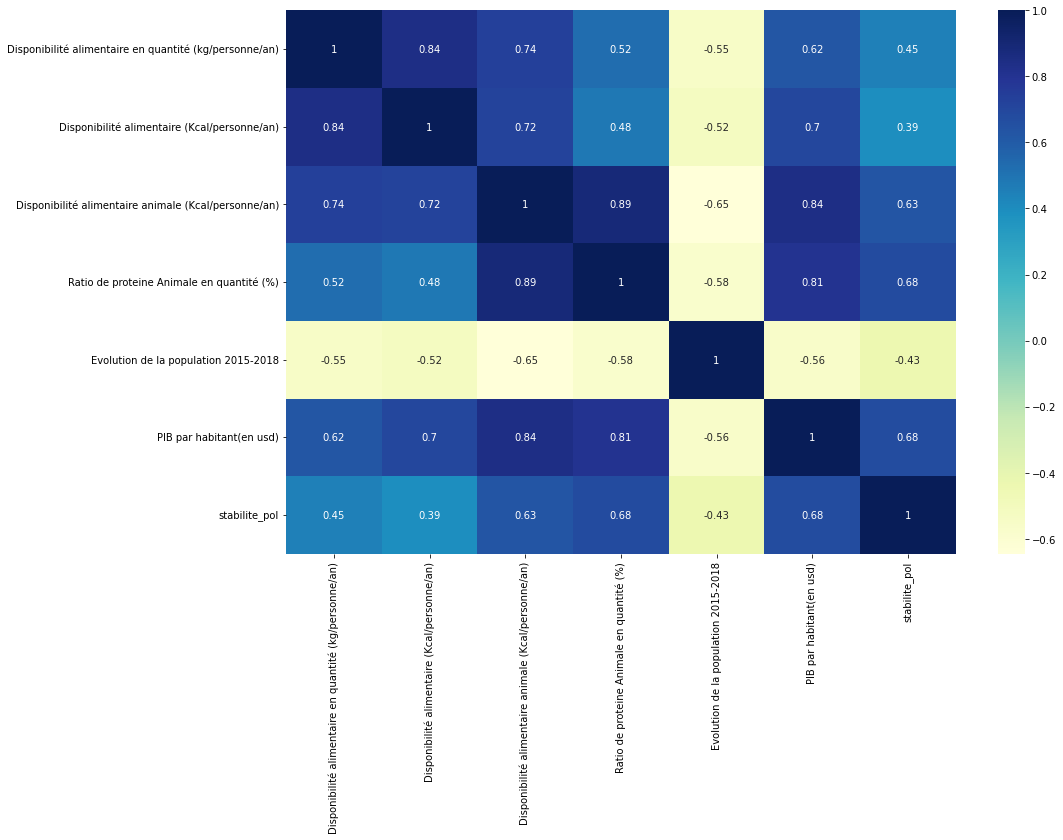

In [109]:

# Calcul des p-values pour chaque paire de variables
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_spearman,annot=True,cmap="YlGnBu")
plt.show()
fig.savefig('correlation_heatmap.png',dpi=fig.dpi*10)

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="23">Analyse en composantes principales ( ACP)</a></h3>
</div>

In [110]:
 # Sélectionner uniquement les colonnes numériques
data_numeric = data.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)

# ACP
pca = PCA()
data_pca = pca.fit_transform(data_normalized)

In [111]:
data_numeric

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
0,357.31,728905.0,68985.0,21.76,8.015197,530.149831,-2.80
1,556.42,1090255.0,160600.0,45.54,4.344302,6723.928582,-0.28
2,1260.49,1241000.0,383980.0,54.23,-0.268914,4521.752217,0.38
3,798.71,1220925.0,155855.0,31.18,6.293751,4134.936055,-0.92
4,943.24,1299035.0,401135.0,66.54,1.634734,44670.222282,0.59
...,...,...,...,...,...,...,...
167,627.67,1230050.0,181405.0,36.85,3.973475,42522.377617,0.62
168,563.62,943525.0,196735.0,53.84,5.380810,6246.404252,-0.07
169,990.38,1373130.0,379235.0,71.99,1.937792,59059.596403,0.29
170,361.77,840960.0,37230.0,9.81,8.319450,709.761008,-1.68


In [112]:
pca.explained_variance_

array([4.48674452, 0.87287256, 0.734078  , 0.42111357, 0.29974847,
       0.1614639 , 0.06491464])

In [113]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.486745,64.0,64.0
1,Dim2,0.872873,12.0,76.0
2,Dim3,0.734078,10.0,87.0
3,Dim4,0.421114,6.0,93.0
4,Dim5,0.299748,4.0,97.0
5,Dim6,0.161464,2.0,99.0
6,Dim7,0.064915,1.0,100.0


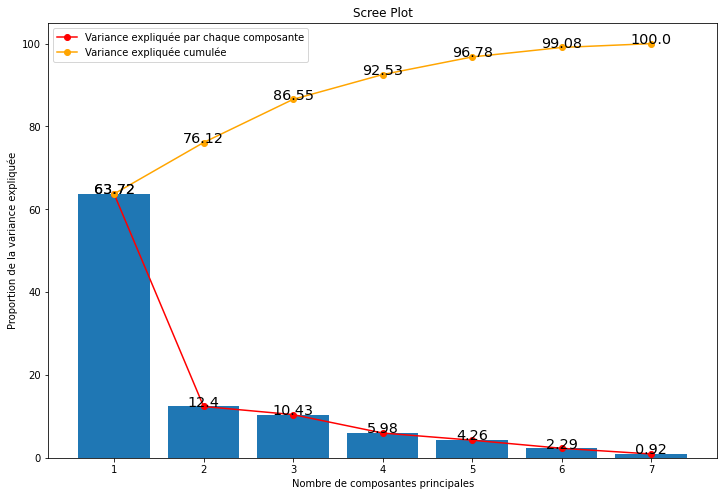

In [114]:


# Calculer la variance expliquée cumulée

explained_variance = pca.explained_variance_ratio_*100

cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot avec la variance expliquée cumulée
fig = plt.figure(figsize=(12, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante',c="r")
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée',c='orange')
for i in range(0,len(explained_variance)):
    plt.text(i+1, cumulative_explained_variance[i], str(round(cumulative_explained_variance[i],2)), ha='center',fontsize='x-large')
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
# Ajout des étiquettes
for i in range(0,len(explained_variance)):
    plt.text(i+1, explained_variance[i], str(round(explained_variance[i],2)), ha='center',fontsize='x-large')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()
fig.savefig('scree_plot_acp_1.png',dpi=fig.dpi*10)

### Aide à l'interprétation

##### Qualité de représentation des variables et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des variables sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des variables (cosinus carré)**

La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé **cos2**. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.

La formule pour calculer le cos2 pour une variable `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$


ooù $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`.


**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR)**

La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$


où :
- $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`
- $n$ est le nombre total de variables
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`


Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.

En interprétant les contributions des variable  à la formation des axes, **il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables)** comme étant importantes pour la formation de l'axe principal considéré.

In [115]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(data_numeric.shape[1])])
df_cos_squared.index = data_numeric.columns[:]

df_cos_squared = df_cos_squared.iloc[:,:2]
df_cos_squared["representation dans le premier plan factoriel"] = df_cos_squared.PC1+df_cos_squared.PC2
df_cos_squared

,PC1,PC2,representation dans le premier plan factoriel
Disponibilité alimentaire en quantité (kg/personne/an),0.153377,0.147518,0.300895
Disponibilité alimentaire (Kcal/personne/an),0.197867,0.187014,0.384880
Disponibilité alimentaire animale (Kcal/personne/an),0.038715,0.119988,0.158703
Ratio de proteine Animale en quantité (%),0.048381,0.018769,0.067149
Evolution de la population 2015-2018,0.087731,0.000195,0.087926
PIB par habitant(en usd),0.405144,0.523166,0.928310
stabilite_pol,0.068785,0.003351,0.072137


In [116]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = data_numeric.shape[1]
feature_names=data_numeric.columns[0:8]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

variable_contrib_df = variable_contrib_df.iloc[:,:2]
variable_contrib_df

,PC1_contrib,PC2_contrib
Disponibilité alimentaire en quantité (kg/personne/an),0.688163,0.172713
Disponibilité alimentaire (Kcal/personne/an),0.661877,0.163239
Disponibilité alimentaire animale (Kcal/personne/an),0.899358,0.001972
Ratio de proteine Animale en quantité (%),0.690382,0.098315
Evolution de la population 2015-2018,0.470740,0.100382
PIB par habitant(en usd),0.563104,0.106368
stabilite_pol,0.513120,0.229884


In [117]:
interpretation = pd.concat([df_cos_squared,variable_contrib_df],axis=1)
interpretation

,PC1,PC2,representation dans le premier plan factoriel,PC1_contrib,PC2_contrib
Disponibilité alimentaire en quantité (kg/personne/an),0.153377,0.147518,0.300895,0.688163,0.172713
Disponibilité alimentaire (Kcal/personne/an),0.197867,0.187014,0.384880,0.661877,0.163239
Disponibilité alimentaire animale (Kcal/personne/an),0.038715,0.119988,0.158703,0.899358,0.001972
Ratio de proteine Animale en quantité (%),0.048381,0.018769,0.067149,0.690382,0.098315
Evolution de la population 2015-2018,0.087731,0.000195,0.087926,0.470740,0.100382
PIB par habitant(en usd),0.405144,0.523166,0.928310,0.563104,0.106368
stabilite_pol,0.068785,0.003351,0.072137,0.513120,0.229884


### Cercle de correlation ACP

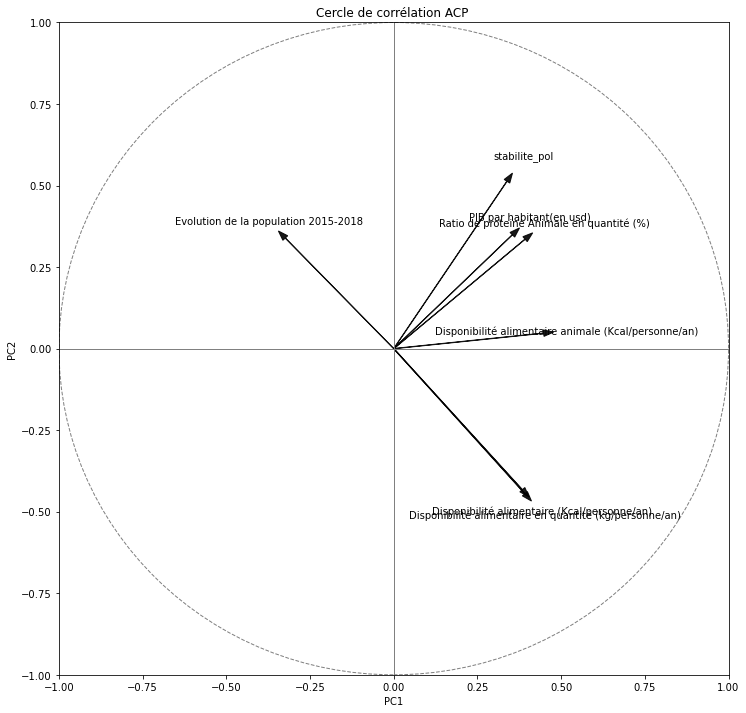

In [118]:

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
fig = plt.figure(figsize=(12,12))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data_numeric.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()
fig.savefig('cercle_de_correlation_1.png',dpi=fig.dpi*10)

### Projection des individus sur le premier plan factoriel

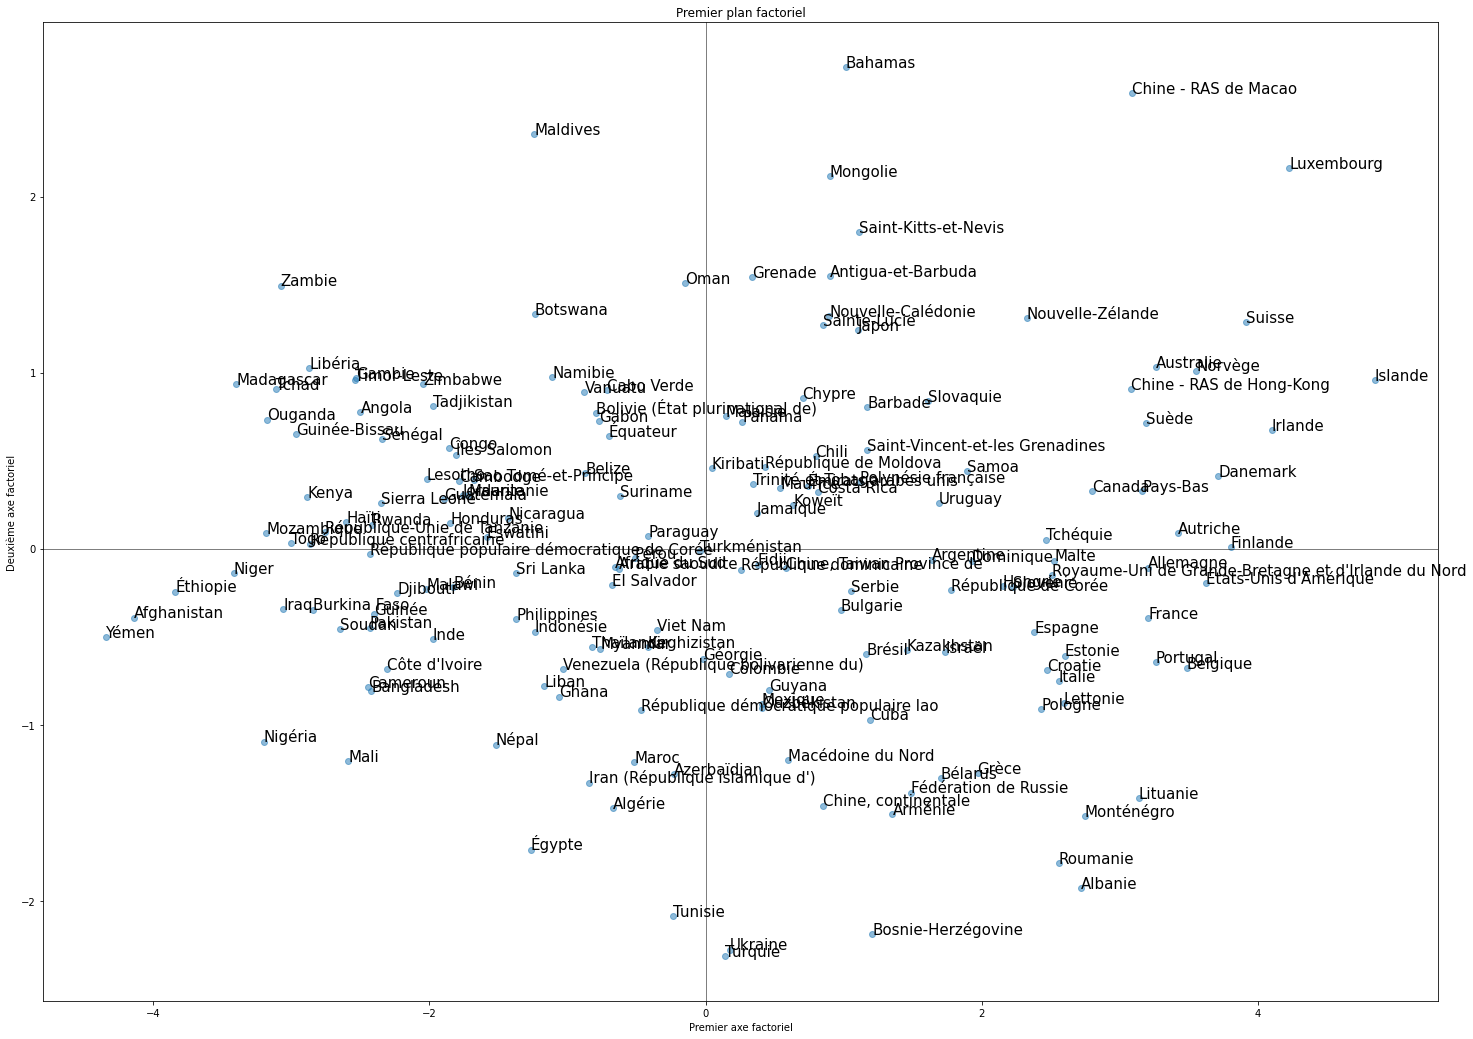

In [119]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(25, 18))
ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)


# Ajouter des étiquettes pour chaque point (type de publication)
for i, Zone in enumerate(data['Zone']):
    ax.annotate(Zone, (data_pca[i, 0], data_pca[i, 1]), alpha=1,fontsize=15)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxième axe factoriel')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()
fig.savefig('projection_des_individus.png',dpi=fig.dpi*10)

### Interpretation des variables

#### Au vu du cercle de correlation et de la representativité des variables sur les deux premiers axes factoriels, on peut remarquer que les zones avec une forte disponibilité alimentaire , ont une bonne stabilité politique et un taux d'évolution de population bas .

[RETOUR AU SOMMAIRE](#200)